## Day 7
https://adventofcode.com/2025/day/7

In [3]:
from collections import defaultdict

def solve7(filename):

    with open(filename) as f:
        diagram = [ l.strip("\n") for l in f.readlines() ]
    
    # locate S
    c = diagram[0].find("S")

    # count number of beams in each column in dictionary, otherwise the amount needed for part 2 would explode!
    beams = defaultdict(int)
    beams[c] = 1
    splits = 0
    
    for r in diagram[1:]:
        beams_new = defaultdict(int)
        for c in beams:
            if r[c]=="^": # split
                beams_new[c-1] += beams[c]
                beams_new[c+1] += beams[c]
                splits +=1
            else:
                beams_new[c] += beams[c]
        beams = beams_new
    
    return splits, sum([count for b,count in beams.items()])

In [4]:
s0, b0 = solve7("examples/example07.txt")
s, b = solve7("AOC2025inputs/input07.txt")

print("Test 1:", s0)
print("Part 1:", s)
print("Test 2:", b0)
print("Part 2:", b)

Test 1: 21
Part 1: 1541
Test 2: 40
Part 2: 80158285728929


In [91]:
from math import log10
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib import colors, cm

def animate7(filename):

    cmap="winter"
    vmax = 1e12
    with open(filename) as f:
        diagram = [ l.strip("\n") for l in f.readlines() ]

    graph = np.zeros((len(diagram),len(diagram[0])), dtype=int)
    rows, cols = graph.shape
    for r in range(rows):
        for c in range(cols):
            if  diagram[r][c]=="^":
                graph[r,c]=vmax
                
    f = plt.figure(figsize=(5,5),dpi=100)
    ax = f.add_axes([0, 0, 1, 1])
    ax.axis('off')
    camera = Camera(f)
    
    # locate S
    c = diagram[0].find("S")
    graph[0][c]=1
    plt.imshow(graph,cmap=cmap, norm=colors.LogNorm(vmin=0.01, vmax=vmax))
    camera.snap()
    
    # count number of beams in each column in dictionary, otherwise the amount needed for part 2 would explode!
    beams = defaultdict(int)
    beams[c] = 1
    splits = 0
    
    for ri,r in enumerate(diagram[1:]):
        beams_new = defaultdict(int)
        for c in beams:
            if r[c]=="^": # split
                beams_new[c-1] += beams[c]
                beams_new[c+1] += beams[c]
                splits +=1
            else:
                beams_new[c] += beams[c]
        beams = beams_new
        for c in beams.keys():
            graph[ri+1][c]=beams[c]
        plt.imshow(graph,cmap=cmap, norm=colors.LogNorm(vmin=0.01, vmax=vmax))
        camera.snap()
    
    return camera

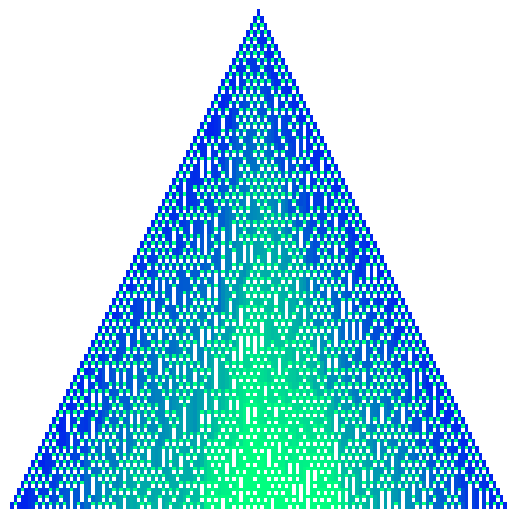

In [92]:
camera = animate7("AOC2025inputs/input07.txt")
anim = camera.animate(blit=True)
anim.save("visualisation/day07.gif",writer='pillow')

![](visualisation/day07.gif)